# Scikit-Learn kütüphanesi ile Doğrusal Regresyon modeli


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data1 = pd.read_csv(r"real_estate_data.csv")
data1.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [28]:
data1.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [29]:
X1 = data1[["X3 distance to the nearest MRT station"]]
y1 = data1[["Y house price of unit area"]]


In [30]:
from sklearn.model_selection import train_test_split

x_train1, x_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.33, random_state=0)



In [31]:
X_train1 = x_train1.sort_index()
Y_train1 = y_train1.sort_index()
X_test1 = x_test1.sort_index()
Y_test1 = y_test1.sort_index()


In [32]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.fit_transform(X_test1)
Y_train1 = sc.fit_transform(Y_train1)
Y_test1 = sc.fit_transform(Y_test1)

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train1,Y_train1)

y_pred1 = lr.predict(X_test1)    # y_pred =? Y_test



Text(0, 0.5, 'Profit')

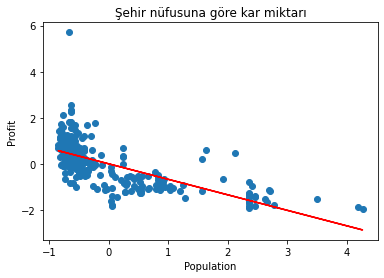

In [34]:
plt.scatter(X_train1,Y_train1)
plt.plot(X_train1,lr.predict(X_train1), color = "r")
plt.title("Şehir nüfusuna göre kar miktarı")
plt.xlabel("Population")
plt.ylabel("Profit")

In [35]:
deg = lr.predict([[7]])*10000

print("For population = 70,000, we predict a profit of $"+str(deg[0][0]))



For population = 70,000, we predict a profit of $-47054.82083827418


In [36]:
from sklearn.metrics import r2_score

print("R-squared: ", r2_score(Y_test1, y_pred1))

R-squared:  0.46387218181524625


In [37]:
def mSE(y_pred, y_test):
    
    return np.sum((y_pred- y_test)**2) / len(y_pred)


mSE(y_pred1, Y_test1)

print("Mean Squared Error değeri: "+ str(round(mSE(y_pred1,Y_test1),5)))

Mean Squared Error değeri: 0.53613
